In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

a. In OpenCV the cv2.imread() reads the image in BGR format and when displaying the same image as the format matches the image is displayed correctly without the need of color conversion.<br>
b. Where as in mathplotlib.pyplot, the default color channel is RGB. When the image is read by cv2.imread(), the format is BGR and matplotlib assumes the BGR to be in RGB format. If the image is displayed with plt.imshow() the color in the images changes. So to display the inage with correct colors, we need to conver the color format from BGR to RGB before displaying the image with plt.imshow() 

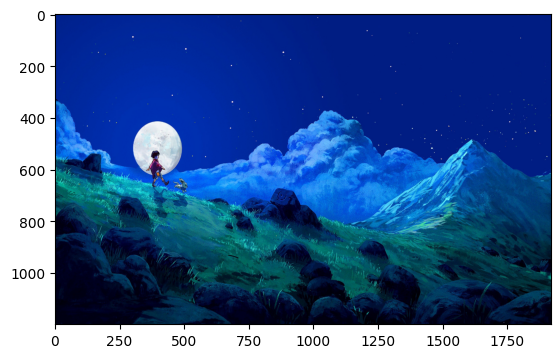

In [ ]:
# with cv2
img = cv2.imread('images/image.png')
cv2.imshow("original image",img)
cv2.waitKey(400)
cv2.destroyAllWindows()

# with plt
img = cv2.imread('images/image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("original image")
plt.imshow(img)


In [3]:
captuer = cv2.VideoCapture(0)

while True:
    isTrue, frame = captuer.read()
    cv2.imshow('Video', frame)

    if cv2.waitKey(20) & 0xFF==ord('q'):
        break

captuer.release()
cv2.destroyAllWindows()

In [3]:
# resizing function
# works for all images, videos and live videos
def rescaleFrames(frame, scale=0.75):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)

    dimensions = (width, height)
    return cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)



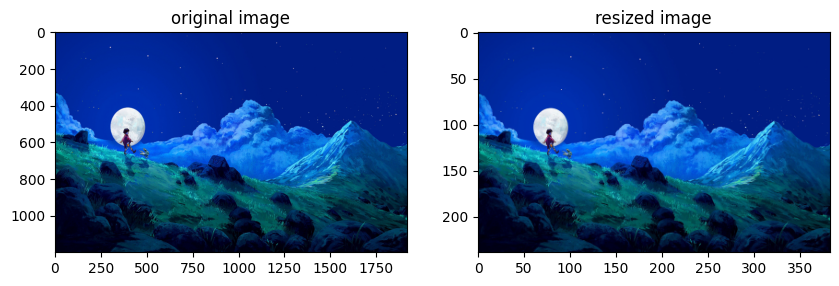

In [ ]:
# image resizing
# with cv2
img = cv2.imread('images/image.png')
resized_image = rescaleFrames(img, scale=0.2)
cv2.imshow('Original Image', img)
cv2.imshow('Resized Image', resized_image)

cv2.waitKey(400)
cv2.destroyAllWindows()

# with plt
img = cv2.imread('images/image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = rescaleFrames(img, scale=0.2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1);plt.title("original image");plt.imshow(img)
plt.subplot(1,2,2);plt.title("resized image");plt.imshow(resized_image)

In [4]:
# video resizing
captuer = cv2.VideoCapture(0)

while True:
    isTrue, frame = captuer.read()

    frame_resized = rescaleFrames(frame, scale=0.75)
    cv2.imshow('Video', frame)
    cv2.imshow('Video Resized', frame_resized)

    if cv2.waitKey(20) & 0xFF==ord('q'):
        break

captuer.release()
cv2.destroyAllWindows()

In [5]:
# function to change resolution of video
# works only in live video
def changeRes(width, height):
    captuer.set(3, width)
    captuer.set(4, height)

In [6]:
captuer = cv2.VideoCapture(0)

while True:
    isTrue, frame = captuer.read()
    changeRes(640, 480)
    cv2.imshow('Video', frame)
    if cv2.waitKey(20) & 0xFF==ord('q'):
        break
captuer.release()
cv2.destroyAllWindows()

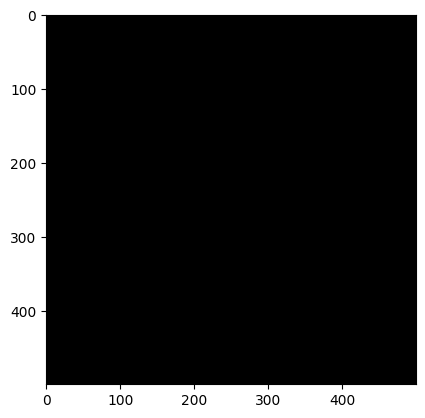

In [2]:
# draw in an image
blank = np.zeros((500,500,3), dtype="uint8")
cv2.imshow("Blank Black Image", blank)
cv2.waitKey(600)
cv2.destroyAllWindows()

blank = np.zeros((500,500,3), dtype="uint8")
plt.imshow(blank, cmap='gray')

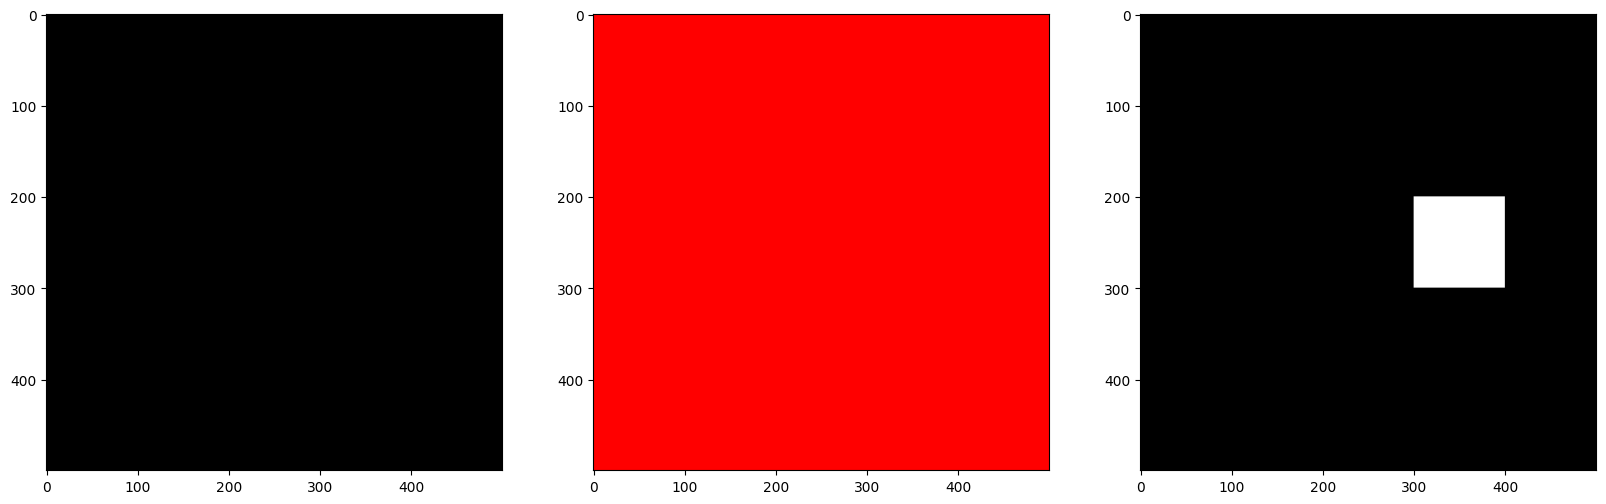

In [3]:
# paint the whole blank image
blank_whole = blank.copy()
blank_whole[:] = 255,0,0

# paint a portion of blank image
blank_partial = blank.copy()
blank_partial[200:300,300:400] = 255,255,255

# with cv2
cv2.imshow("blank",blank)
cv2.imshow("blank_whole",blank_whole)
cv2.imshow("blank_partial",blank_partial)

cv2.waitKey(600)
cv2.destroyAllWindows()

# with plt
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(blank)
plt.subplot(132); plt.imshow(blank_whole)
plt.subplot(133); plt.imshow(blank_partial)

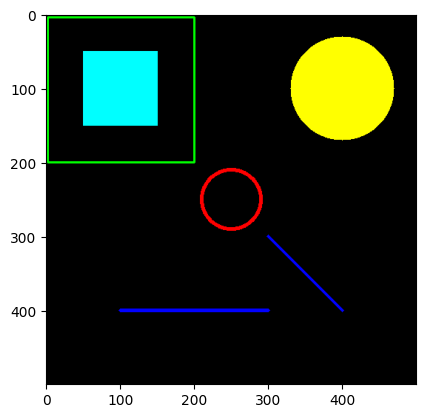

In [5]:
# draw shapes over an image 
blank_shapes = blank.copy()
cv2.rectangle(blank_shapes, (2,4), (200,200), (0,255,0), thickness=2)
cv2.rectangle(blank_shapes, (50,50), (150,150), (0,255,255), thickness=-1)

cv2.circle(blank_shapes, (250,250), 40, (255,0,0), thickness=3)
cv2.circle(blank_shapes, (400,100), 70, (255,255,0), thickness=-1)

cv2.line(blank_shapes, (300,300), (400,400), (0,0,255), thickness=4)
cv2.line(blank_shapes, (100,400), (300,400), (0,0,255), thickness=4)

# with cv2
cv2.imshow("shapes in blank image", blank_shapes)
cv2.waitKey(1000)
cv2.destroyAllWindows()

# with plt
plt.imshow(blank_shapes)


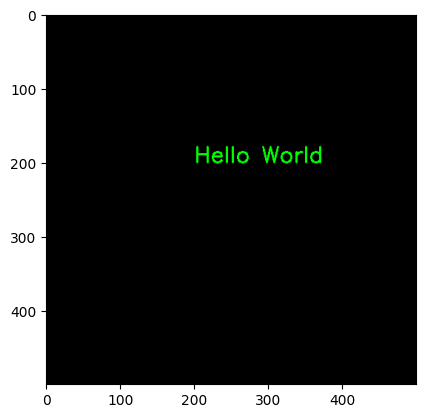

In [6]:
# write text over an image
blank_text = blank.copy()
cv2.putText(blank_text, 'Hello World', (200,200),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2)

# with cv2
cv2.imshow("text in blank image", blank_text)
cv2.waitKey(1000)
cv2.destroyAllWindows()

# with plt
plt.imshow(blank_text)

5 essential function in OpenCV

1) Color conversion


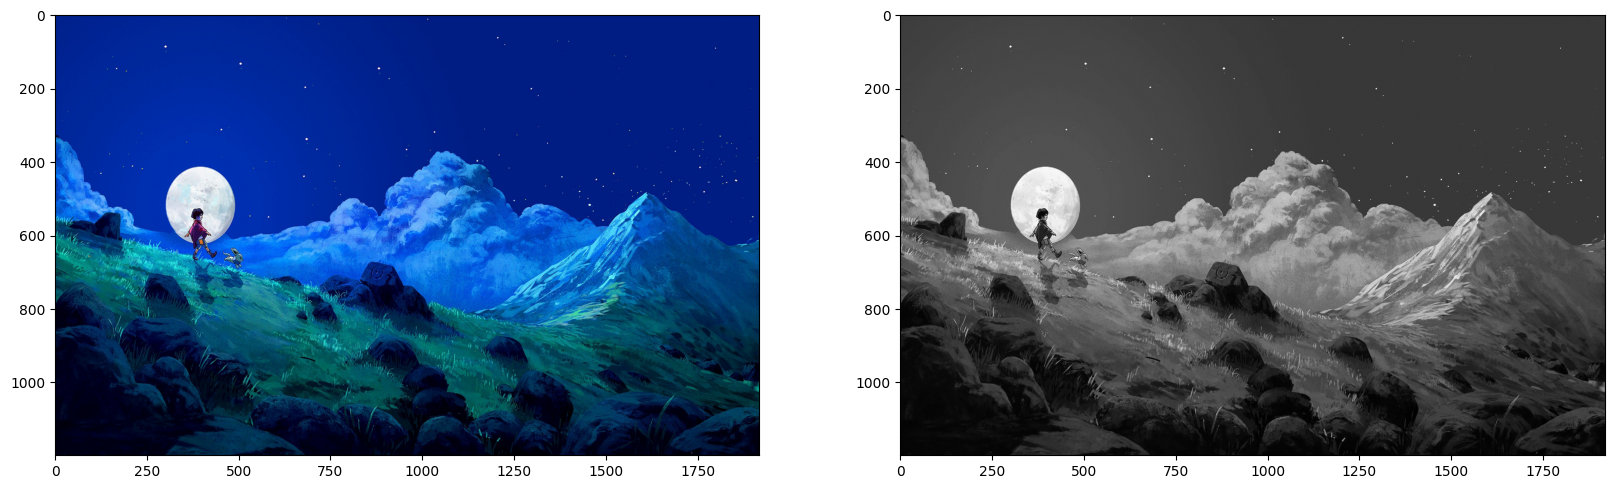

In [7]:
# convert an image to grayscale
img = cv2.imread('images/image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(img_gray, cmap='gray')

2) Bluring an image

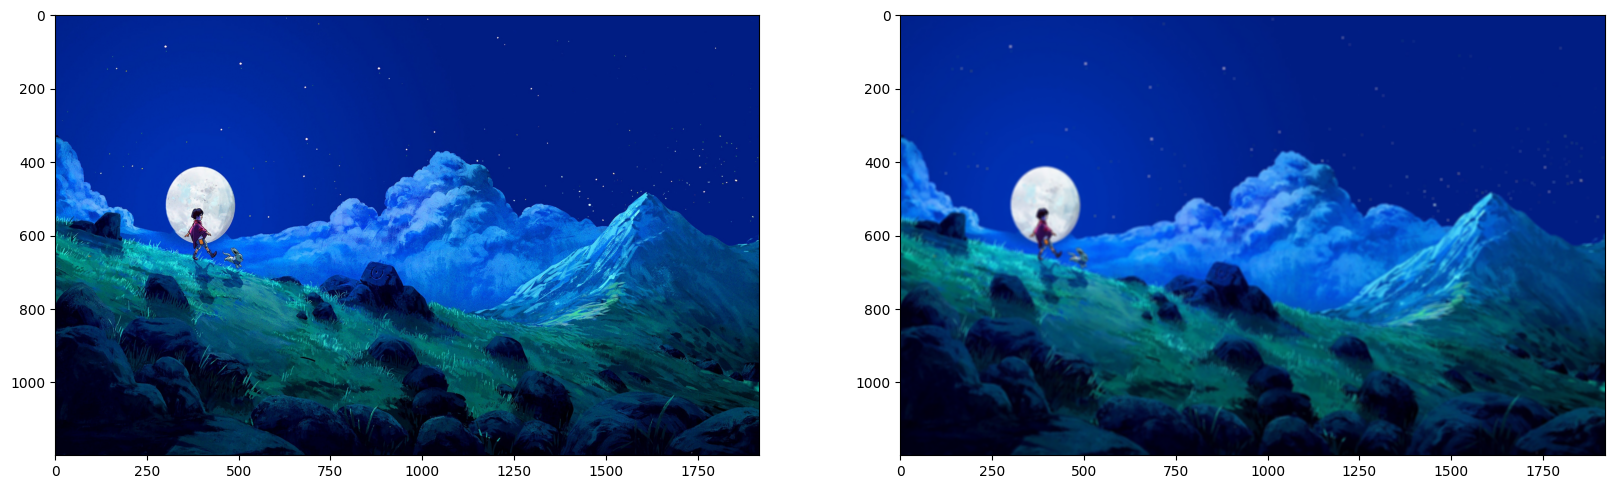

In [8]:
# blur an image
img = cv2.imread('images/image.png')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(img, (9,9), cv2.BORDER_DEFAULT)
plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(img_blur)

3) Canny edge detection
    used to detect edges in an image

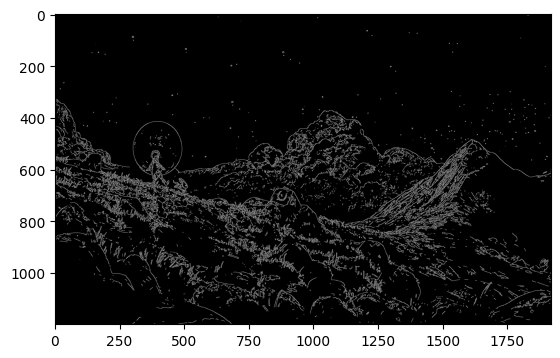

In [9]:
# edge cascade classifier
# canny edge detector
canny = cv2.Canny(img, 125,175)
plt.imshow(canny, cmap='gray')

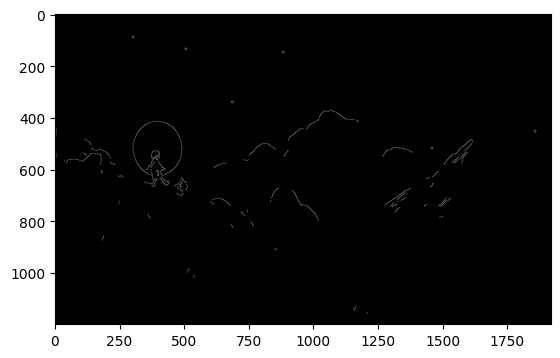

In [10]:
# no of edge detected can be resuced by blurring 
# the image before applying canny edge detector
# it is done to reduce noise in the image
canny = cv2.Canny(img_blur, 125,175)
plt.imshow(canny, cmap='gray')

After cany edge detection, the image can be dilated so that the edges 
that were detected can be made thicker, close the gap between broken edges
Also it helps in better contour detection

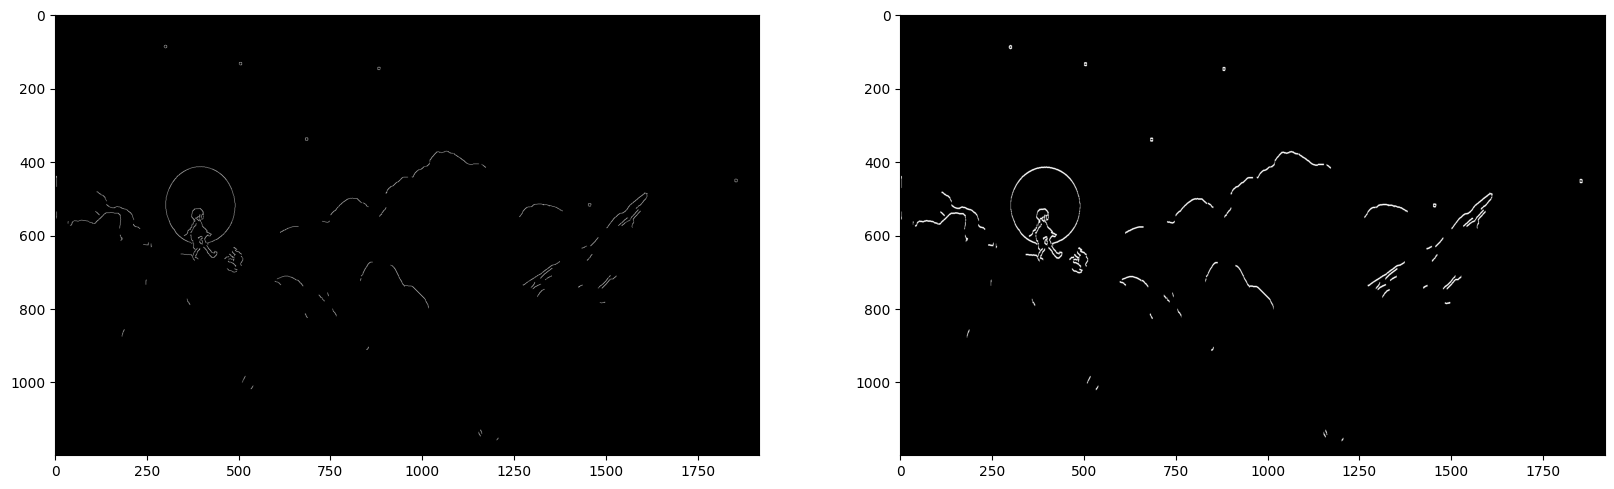

In [ ]:

dilated = cv2.dilate(canny, (11,11), iterations=3)
plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(canny, cmap='gray')
plt.subplot(122);plt.imshow(dilated, cmap='gray')

the dilated image can be eroded to get back the original image
erosion helps in removing small white noises, detach two connected objects etc


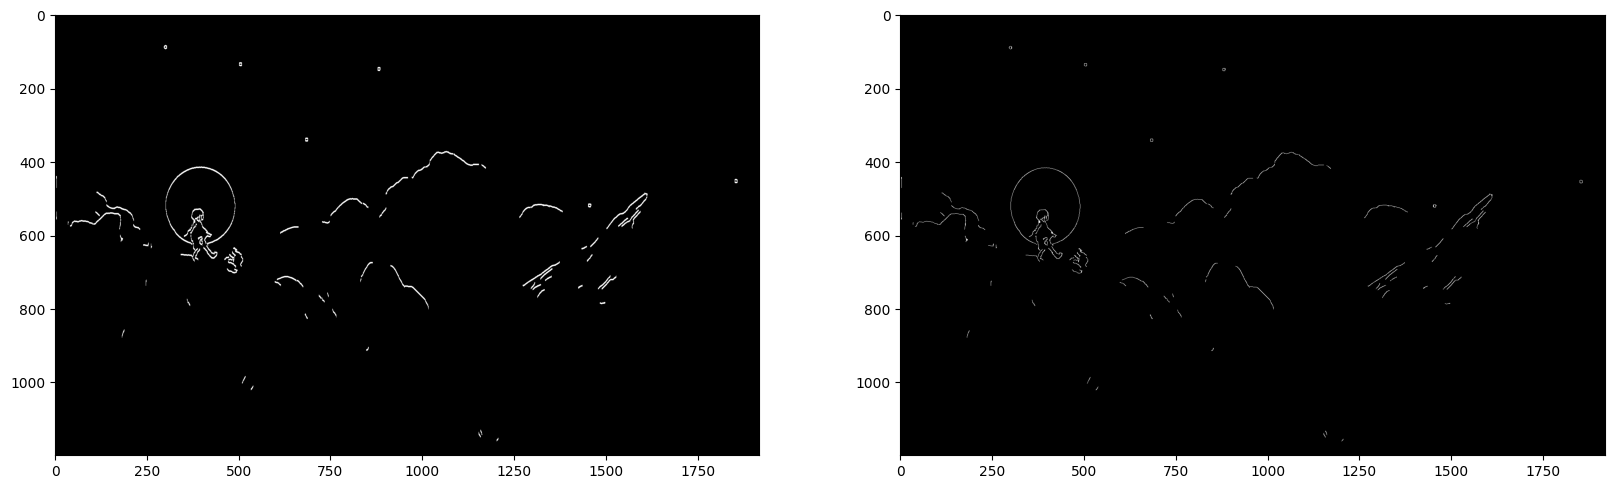

In [ ]:
eroded = cv2.erode(dilated, (11,11), iterations=3)
plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(dilated, cmap='gray')
plt.subplot(122);plt.imshow(eroded, cmap='gray')

4) Image resizing


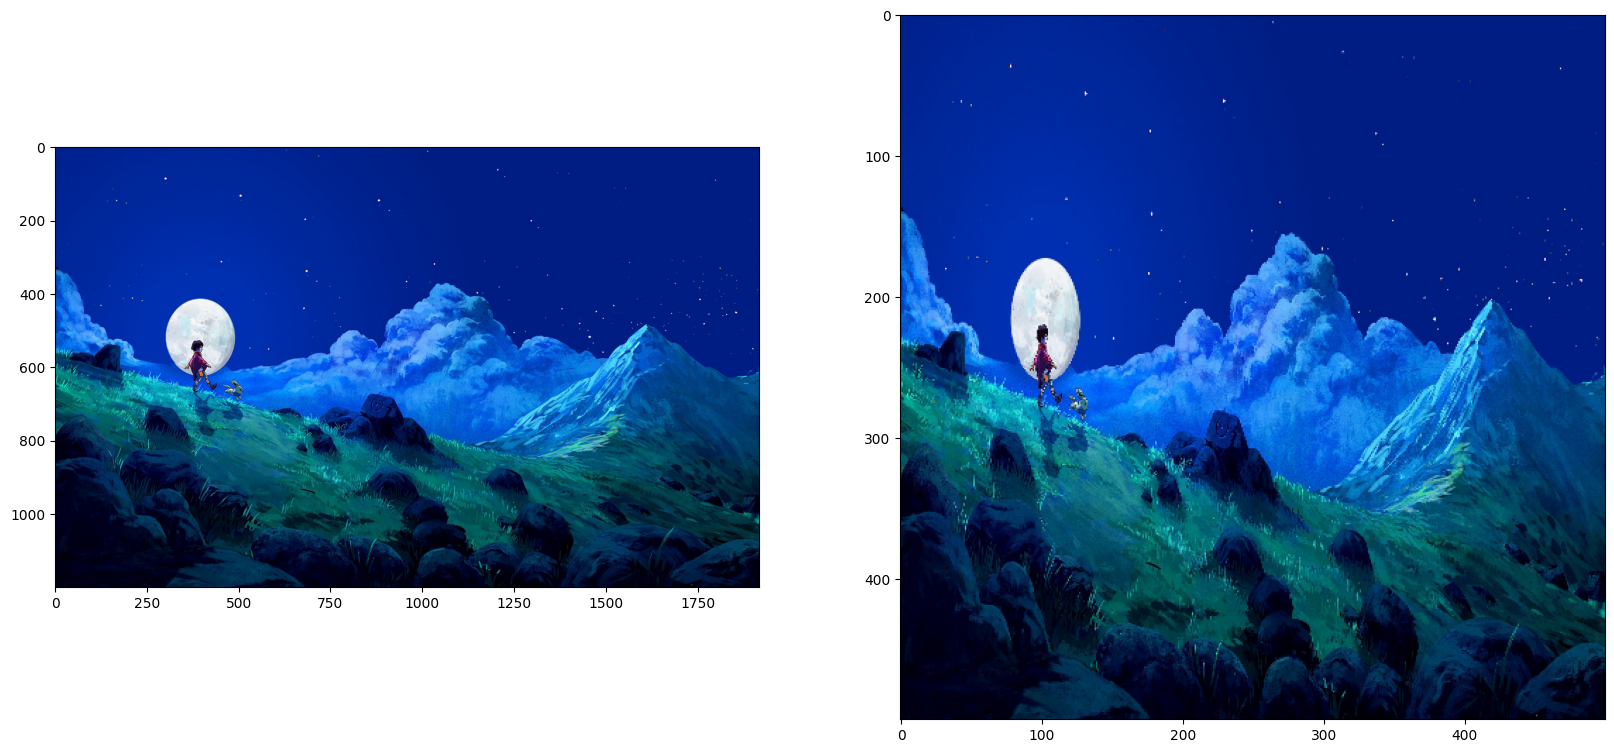

In [8]:
# resize image ignoring the aspect ratio
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resizes = cv2.resize(img,(500,500),interpolation= cv2.INTER_LINEAR)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(img)
plt.subplot(1,2,2);plt.imshow(resizes)

5) Image cropping using array slicing



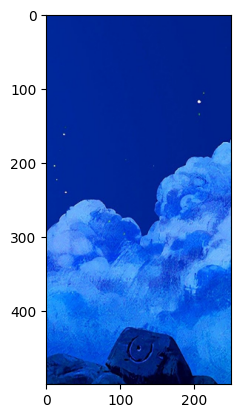

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped = img[250:750, 750:1000]
plt.imshow(cropped)

Image Transformation

1) Image Translation

np.float32() is used for creating the translation matrix because of it's compatibility with OpenCV and its efficiency

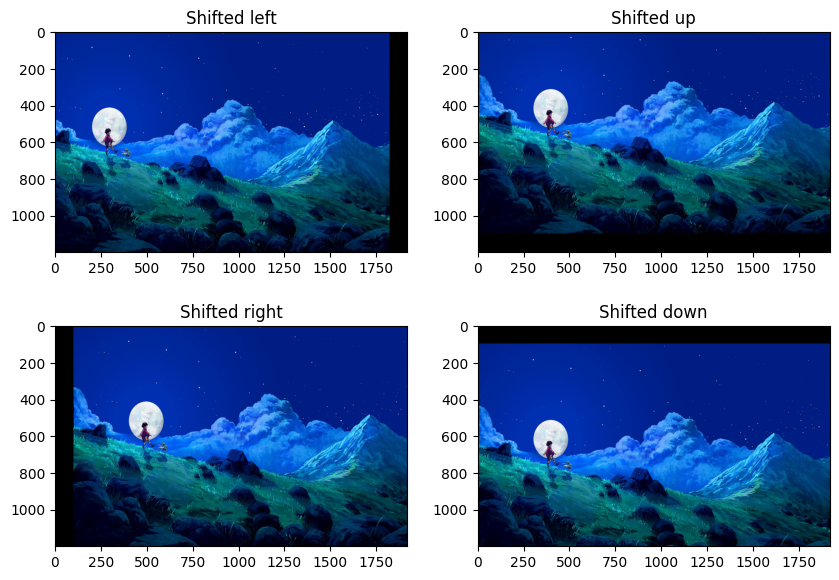

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def translate(img, x, y): 
    transMat = np.float32([[1,0,x],[0,1,y]])#creates a translation matrix of 2X3 and array of type np.float32
    dimensions = (img.shape[1],img.shape[0])#gets the original height and width of the input image
    return cv2.warpAffine(img, transMat, dimensions)

#  -x = shift left
#  -y = shift up
# x = shift right
#  y = shift down
plt.figure(figsize=(10,7))
translated = translate(img,-100,0)
plt.subplot(2,2,1);plt.title("Shifted left");plt.imshow(translated)
translated = translate(img,0,-100)
plt.subplot(2,2,2);plt.title("Shifted up");plt.imshow(translated)
translated = translate(img,100,0)
plt.subplot(2,2,3);plt.title("Shifted right");plt.imshow(translated)
translated = translate(img,0,100)
plt.subplot(2,2,4);plt.title("Shifted down");plt.imshow(translated)




Shift image to the right and down by 100px

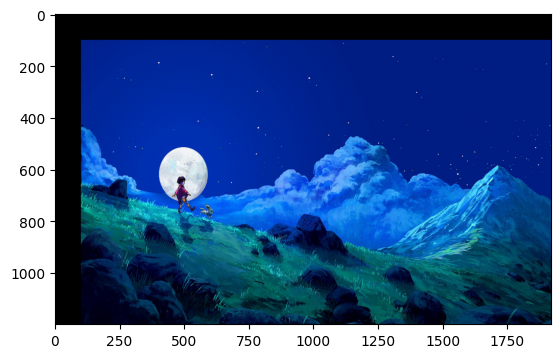

In [44]:
translated = translate(img,100,100)
plt.imshow(translated)

Shift image to the left and up by 100px

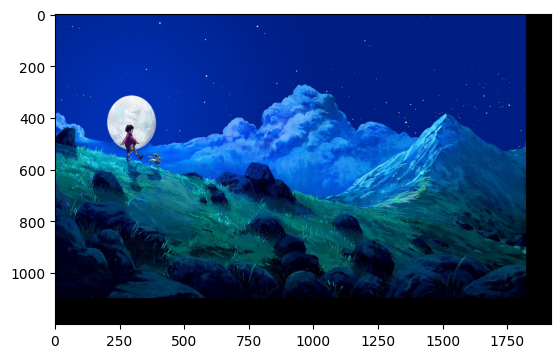

In [45]:
translated = translate(img,-100,-100)
plt.imshow(translated)

2) Image Rotation

Text(0.5, 1.0, 'Rotates the rotated image clockwise by 45 degree')

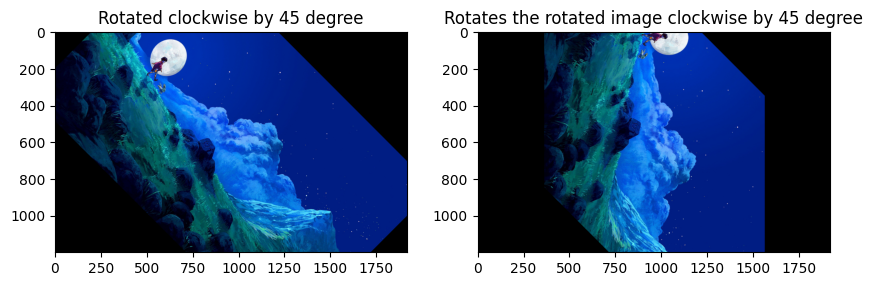

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rotate(img, angle, rotPoint = None):
    (height, width) = img.shape[:2]

    if rotPoint == None:
        rotPoint = (width//2, height//2)
    
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = width,height

    return cv2.warpAffine(img, rotMat, dimensions)

plt.figure(figsize=(10,10))
rotated = rotate(img,-45)
plt.subplot(1,2,1)
plt.imshow(rotated)
plt.title("Rotated clockwise by 45 degree")
# in the plot, black triangles can be seen, these triangles are there to basically fill
# the rotated image and are black in color by default

rotated_rd = rotate(rotated, -45)
plt.subplot(1,2,2)
plt.imshow(rotated_rd)
plt.title("Rotates the rotated image clockwise by 45 degree")
# Here the image that was rotated before is rotated clockwise by another 45 degree
# So the rotated image with the black triangles is taken as a base image due to which,
# the new rotated image have more black areas.    

Text(0.5, 1.0, 'Rotated clockwise by 90 degree')

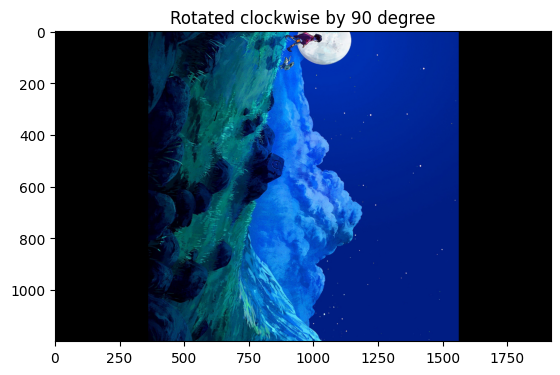

In [52]:
rotated = rotate(img,-90)
plt.imshow(rotated)
plt.title("Rotated clockwise by 90 degree")

3) Image Resizing

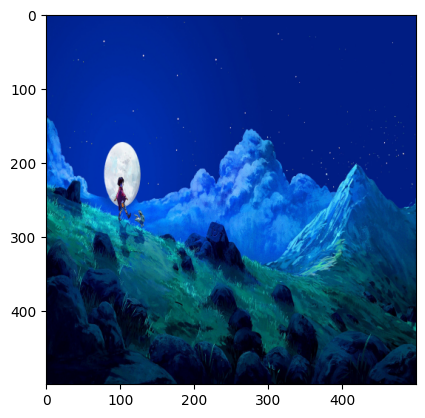

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

"""
cv2.resize() takes the source image, destination or output image size 
and interpolation
in interpolation, the default is the inter_linear
when shrinking an image inter_area can be used
when enlagrging an image inter_linear or inter_cubic can be used
"""
resized = cv2.resize(img, (500,500), interpolation=cv2.INTER_AREA)
plt.imshow(resized)



4) Image Flipping

a. Flipping image vertically = 0 (over the x-axis)<br>
b. Flipping image horizontally = 1 (over the y-axis)<br>
c. Flipping image both vertically and horizontally = -1 (over both x-axis and y-axis)

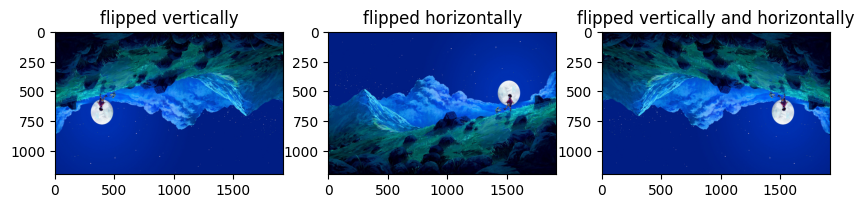

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flip_v = cv2.flip(img,0)
flip_h = cv2.flip(img,1)
flip_vh = cv2.flip(img,-1)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1);plt.title("flipped vertically");plt.imshow(flip_v)
plt.subplot(1,3,2);plt.title("flipped horizontally");plt.imshow(flip_h)
plt.subplot(1,3,3);plt.title("flipped vertically and horizontally");plt.imshow(flip_vh)

5) Image Cropping

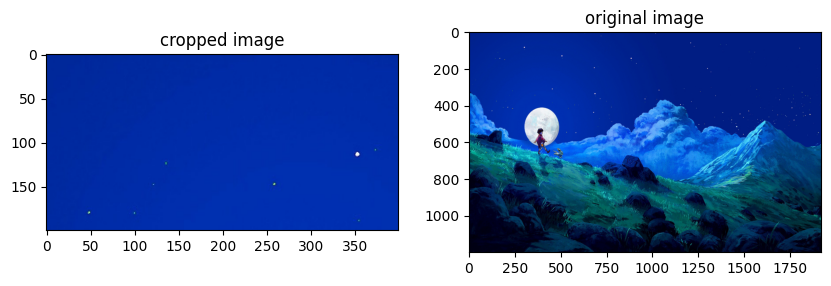

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cropped = img[200:400, 100:500]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("cropped image")
plt.imshow(cropped)
plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(img)


Contour Detection in an Image

1) What are contours?<br>
Contours are basically the boundries of objects, the line or curve that joins the continuous points that have the came color or intensity around the boundries of an object.

2) What is the purpose of the Contours?<br>
TO detect the boundries of an object.<br>
Measure the size, shape and area of an object<br>
To track an object or analyze its shape.<br>
to detect the defects or irregularities in an object.<br>
to detect the number of objects in an image.<br>
It can be used to get a specific targated object in an image.<br>
It is used for image segmentation-> seperating the image or objects from its background.

3) what is the process of contour detection?<br>
To detect contours in an image, the image should be preprocessed initially or else the result may not be as to be expected. Firstly the image to perform the contours should be converted into a gray scale image, and then two techniques can be applied, one is to implement edge detection and another is thresholding.

4) What is the function to find the contours in an image?<br>
The function in OpenCv to find the contours is cv2.findContours(), and is written as contours, hierarchies = cv2.findContours(image, mode, method).
Here the image is the converted binary image, mode specifies how the contours are organized and which one are retrived and method defines how the points that make up the contours are stored.<br>
Also here the contours variable stores the list where each individual element is a contour and the hierarchies variable is an array that stores the hierarchial relationship of the contours if an hierarchial retrivel mood is selected.


5) What are the retrivel modes to get the conturs in an image?<br>
The retrivel modes to get the conturs in a canny or thresholded image are:<br>
RETR_TREE is used to retrive all the contures in the image in a hierarchy (parent,child hieraric).<br>
RETR_EXTERNAL is used to retrive only the external contures in the image.<br>
RETR_LIST is used to retrive all the contures in the image without any hierarchy.<br>
RETER_CCOMP (connected component) aranges or organizes the contours of an image into two-level hierarchy (External and Internal boundries.)<br>((External boundaries): The outer boundaries of the main objects or connected components are placed on this level.<br>
(Internal boundaries): The boundaries of any holes within those objects are placed on this level. )<br>

6) What are the methods that is used to store the points that form the contours?<br>
The methods that are used to store the points that form the contours are:<br>
CHAIN_APPROX_NONE <br>
CHAIN_APPROX_SIMPLE<br>




In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/image.png")
img = cv2.resize(img,(600,600), interpolation=cv2.INTER_AREA)
cv2.imshow("original image", img)

blank = np.zeros(img.shape,dtype="uint8")
blank1 = blank.copy()
blank2 = blank.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)

blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
cv2.imshow("blur", blur)

canny = cv2.Canny(blur, 125, 175)
cv2.imshow("canny", canny)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(blank1, contours, -1,(0,0,255), 2 )
cv2.imshow("Contours in blank1 image", blank1)

ret, thresh = cv2.threshold(gray, 125,255, cv2.THRESH_BINARY)
cv2.imshow("Thresh", thresh)

contours, hierarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(blank2, contours, -1,(0,0,255), 1)
cv2.imshow("Contours in blank2 image", blank2)

cv2.waitKey(5000)
cv2.destroyAllWindows()

# img = cv2.imread("images/image.png")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(10,5))
# plt.subplot(1,4,1)
# plt.title("original image")
# plt.imshow(img)

# img = cv2.imread("images/image.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.subplot(1,4,2)
# plt.title("gray image")
# plt.imshow(img,cmap="gray")

# canny = cv2.Canny(img, 125, 175)
# plt.subplot(1,4,3)
# plt.title("canny image")
# plt.imshow(canny,cmap="gray")

60
577


Before calculating the contours in an image, the image should first be changed into gray scale, then the image should be converted binary image which basically means the image should be converted to two color 0 or 255 (black or white). There are two methods to convert the image into binary image. They are:<br><br>
i. Applying Canny Edge Detection.<br>
Firstly Bluring an image and using the cv2.canny() function 'Canny Edge Detection' along with thresholding (pixels with threshold value lower then the given lower threshold value are considered 'week edges' and are excluded in the output image, pixels with threshold value greater then the given higher threshold value are considered 'strong edges' and are included in the output image, where as if the pixel value is in between the lower and higher threshold value, it is considered as 'connecting edges' but it can be eithed included or excluded in the output image depending on their connection with the 'strong edges'). After thresholding, the contours are found and drawn with cv2.findContours() and cv2.drawContours() function respectively.<br><br>
ii. Simple Thresholding.<br>
In this method the gray scale image is taken and passed in the cv2.threshold() function along with a threshold value (if the pixel value is less then the threshold value it is changed into according to the type of thresholding that is being carried out and if the pixel value is greater than the threshold value, pixel value is changed into maxvalue), a max value(the value which is assigned to the pixels that exced the threshold value) and a threshold type which specifies the type of thresholding to be applied(such as binary thresholding, otsu's thresholding, etc).<br>

After carrying out any one of the image conversion methods, the binary image is passed in the cv2.findContoures() function which essentially calculated the contoures in the image. this function returns the contours and the hierarchies.
the function takes the a binary image, node, method and offset(optional) as parameters.<br><br>

After calculating the contours, it can be drawn in a nlank image using the function cv2.drawContours(). yhis function takes the blank image or image wher the contours are to be drawn, calculated contours, contour index(-1 draws all the contours, 0 draws the first contours, 1 draws the second contours), color, thickness, (hierarchy, maxlevel, offset)(optional) as parameters



Canny Edge detection is recommended to be carried out at first to find the contours rather than trying to threshold the image and trying to find the contours.

# Color Spaces

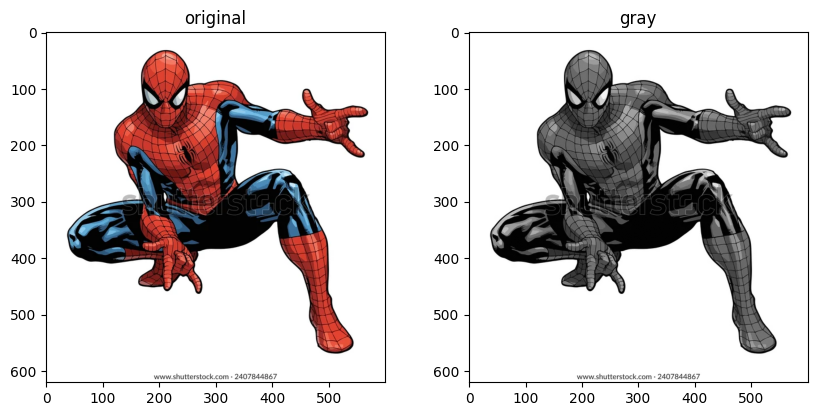

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/spiderman.png")#bgr format
cv2.imshow("Spiderman",img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

# BGR2HSV(Hue,Saturation,Value)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow("HSV",hsv)

# BGR2LAB
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
cv2.imshow("LAB",lab)

# HSV2BGR
hsv_bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imshow("HSV2BGR",hsv_bgr)

# LAB2BGR
lab_bgr = cv2.cvtColor(lab,cv2.COLOR_LAB2BGR)
cv2.imshow("LAB2BGR",lab_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10,10))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1);plt.title("original");plt.imshow(img)
plt.subplot(2,2,2);plt.title("gray");plt.imshow(gray,cmap = "gray")


# Color Channels

Split and merge color channels

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/spiderman.png")#bgr format
cv2.imshow("Spiderman",img)

blank = np.zeros(img.shape[:2], dtype="uint8")
b,g,r = cv2.split(img)

cv2.imshow("Blue",b)
cv2.imshow("Green",g)
cv2.imshow("Red",r)


merged = cv2.merge([b,g,r])
cv2.imshow("Merged",merged)

blue = cv2.merge([b,blank,blank])
green = cv2.merge([blank,g,blank])
red = cv2.merge([blank,blank,r])

cv2.imshow("blue",blue)
cv2.imshow("green",green)
cv2.imshow("red",red)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Bluring


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/spiderman.png")#bgr format
cv2.imshow("Spiderman",img)

# averaging (calculates the average intensity of all the surrounding pixels)
average = cv2.blur(img,(5,5))
cv2.imshow("Average blur",average)

# GaussianBlur ()
gauss = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("Gaussian blur",gauss)


# Gaussian Blur ()
gauss = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("Gaussian blur",gauss)

# Median Blur (calculates the median intensity of all the surrounding pixels)
median = cv2.medianBlur(img,5,0)
cv2.imshow("Median blur",median)

# Bilateral Blur (Applys bluring retaining the edges in the image)
bilateral = cv2.bilateralFilter(img,10,35,25)
cv2.imshow("Bilateral blur",bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bitwise Operators


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img = cv2.imread("images/spiderman.png")#bgr format
# cv2.imshow("Spiderman",img)

blank = np.zeros((400,400), dtype="uint8")

rectangle = cv2.rectangle(blank.copy(),(30,30),(250,250), 255, -1)
circle = cv2.circle(blank.copy(),(200,200), 150, 255, -1)

cv2.imshow("rectangle", rectangle)
cv2.imshow("circle", circle)

# bitwise AND intersecting reason
bitwise_and = cv2.bitwise_and(rectangle,circle)
cv2.imshow("bitwise AND", bitwise_and)

# bitwise OR intersecting and not intersecting reasons
bitwise_or= cv2.bitwise_or(rectangle,circle)
cv2.imshow("bitwise OR", bitwise_or)

# bitwise XOR non intersecting reasons
bitwise_xor= cv2.bitwise_xor(rectangle,circle)
cv2.imshow("bitwise XOR", bitwise_xor)

# bitwise NOT Inverts the binary Color
bitwise_not = cv2.bitwise_not(rectangle)
cv2.imshow("Bitwise-NOT", bitwise_not)

bitwise_not = cv2.bitwise_not(circle)
cv2.imshow("Bitwise NOT", bitwise_not)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Masking


In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/spiderman.png")#bgr format
cv2.imshow("Spiderman",img)

blank = np.zeros(img.shape[:2], dtype="uint8")
cv2.imshow("blank",blank)

mask = cv2.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),100, 255, -1)
cv2.imshow("mask",mask)

masked_img = cv2.bitwise_and(img,img,mask=mask)
cv2.imshow("masked",masked_img)

mask1 = cv2.rectangle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),(img.shape[1]//2 + 100,img.shape[0]//2 + 100), 255, -1)
cv2.imshow("mask1",mask1)

masked_img1 = cv2.bitwise_and(img,img,mask=mask1)
cv2.imshow("masked1",masked_img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograms

Allows to visualize the distribution of pixel intensities with the help of a histogram

histogram of gray scale image and masked gray scale image

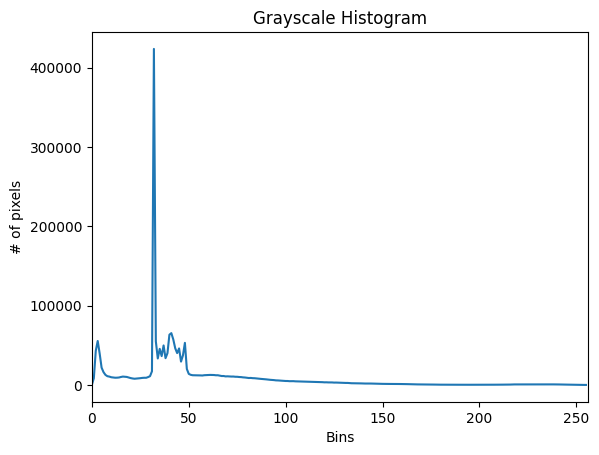

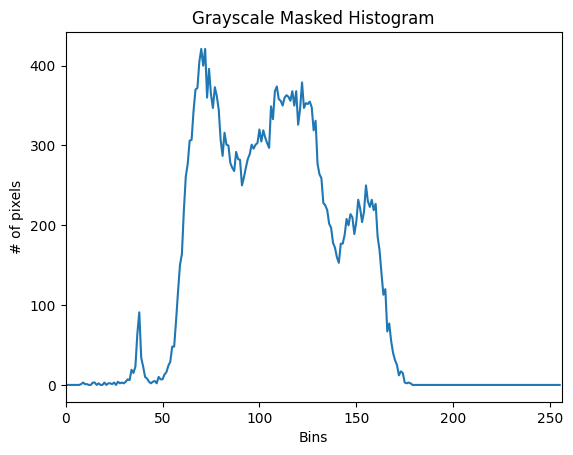

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/image.png")#bgr format
cv2.imshow("Spiderman",img)

blank = np.zeros(img.shape[:2], dtype="uint8")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_hist = cv2.calcHist([gray], [0], None, [256], [0,256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])

circle = cv2.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),100, 255, -1)
mask = cv2.bitwise_and(gray,gray,mask=circle)
cv2.imshow("mask",mask)

gray_hist = cv2.calcHist([gray], [0], mask, [256], [0,256])
plt.figure()
plt.title("Grayscale Masked Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])

cv2.waitKey(0)
cv2.destroyAllWindows()

histogram of colored image and masked gray scale image

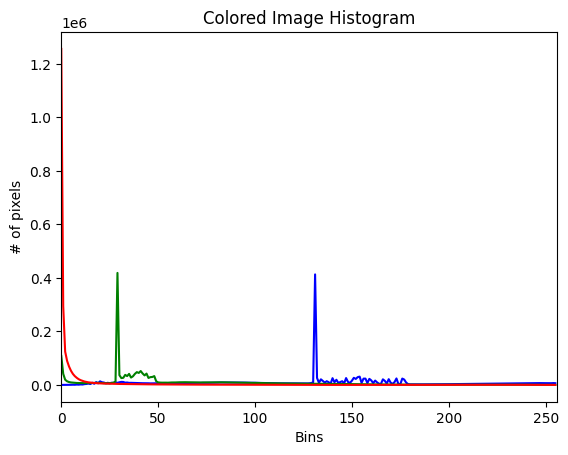

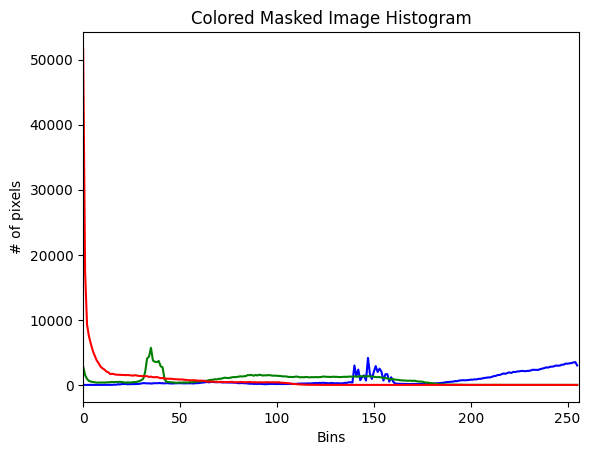

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/image.png")#bgr format
cv2.imshow("Spiderman",img)

blank = np.zeros(img.shape[:2], dtype="uint8")

colors = ('b','g','r')
plt.figure()
plt.title("Colored Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for i,col in enumerate(colors):
    hist = cv2.calcHist([img],[i], None, [256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

mask = cv2.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),250, 255, -1)
masked = cv2.bitwise_and(img,img,mask=mask)
cv2.imshow("mask",mask)

colors = ('b','g','r')
plt.figure()
plt.title("Colored Masked Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for i,col in enumerate(colors):
    hist = cv2.calcHist([img],[i], mask, [256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/spiderman.png")
cv2.imshow("original image",img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray image",gray)

# simple thresholding
ret, thresh = cv2.threshold(gray, 125,255, cv2.THRESH_BINARY)
cv2.imshow("Thresh", thresh)

ret, thresh_inv = cv2.threshold(gray, 125,255, cv2.THRESH_BINARY_INV)
cv2.imshow("Thresh_inv", thresh_inv)

# adaptative thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
cv2.imshow("Adaptative thresholding",adaptive_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge Detection

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/spiderman.png")
cv2.imshow("original image",img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray image",gray)

# laplaction 
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow("Laplaction",lap)

# Sobel
sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0)
sobely = cv2.Sobel(gray, cv2.CV_64F,0,1)
cv2.imshow("Sobel X",sobelx)
cv2.imshow("Sobel Y",sobely)

combimed_sobel = cv2.bitwise_or(sobelx,sobely)
cv2.imshow("Combined Sobel",combimed_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()